# Notebook for material classification

In [5]:
import numpy as np
import glob


def load_interim_samples(path):
    file_list = glob.glob(path + "/*")
    file_list.sort()
    data_unlabeled = []
    for f in file_list:
        interim_data = np.loadtxt(f, delimiter=',', skiprows=1)
        data_unlabeled.append(interim_data)

    return data_unlabeled

In [6]:
data_unlabeled = load_interim_samples("../data/interim/unlabeled")
data_labeled = load_interim_samples("../data/interim/labeled")

I expect unlabeled samples to be a linear combination of labeled samples (more materials can be in one acquisition).
Thus, I am exploring the linear combinations of the labeled samples with positive coefficients
that return the same spectrogram.
In that case, the coeff with account for the abbundance of the material.

**NB** weights are constrained to positive values

In [7]:
from scipy.interpolate import interp1d


def interpolate_signals(data):
    """
    Interpolates signals to enable comparison
    """
    interp_rage = np.arange(0, 2400)
    samples = np.ndarray(shape=(2400, len(data)))
    for i, spec in enumerate(data):
        fit = interp1d(spec[:, 0], spec[:, 1], fill_value="extrapolate")
        samples[:, i] = fit(interp_rage)

    return samples

In [8]:
print(len(data_unlabeled))
samples_labeled = interpolate_signals(data_labeled)
samples_unlabeled = interpolate_signals(data_unlabeled)

samples_labeled.shape, samples_unlabeled.shape

242


((2400, 61), (2400, 242))

In [17]:
from sklearn.linear_model import LinearRegression
import pandas as pd

glob_label = glob.glob("../data/interim/labeled/*")
glob_label.sort()
materials_label = [k.split('/')[-1].split('.')[0] for k in glob_label]

def infer_materials(index):
    model = LinearRegression(positive=True).fit(samples_labeled, samples_unlabeled[:, index])

    quant = pd.DataFrame({
        "label": materials_label,
        "value": model.coef_/sum(model.coef_)
    })

    return quant

In [18]:
def extract_material_perc(range_start, range_stop):
    values = np.zeros(shape = (61,))
    for i in range(range_start, range_stop):
        y_pred = infer_materials(i)
        values += y_pred.value

    S1_quant_df = pd.DataFrame({"labels": materials_label, "value": values / sum(values)})
    return S1_quant_df[S1_quant_df.value != 0.0]

In [19]:
S1 = extract_material_perc(0, 121)
S2 = extract_material_perc(121, 242)

<BarContainer object of 56 artists>

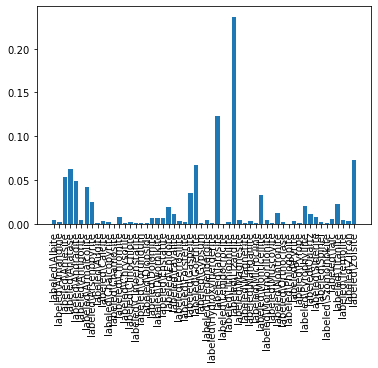

In [20]:
import matplotlib.pyplot as plt

plt.xticks(rotation='vertical')
plt.bar(x = S1.labels, height = S1.value)

<BarContainer object of 60 artists>

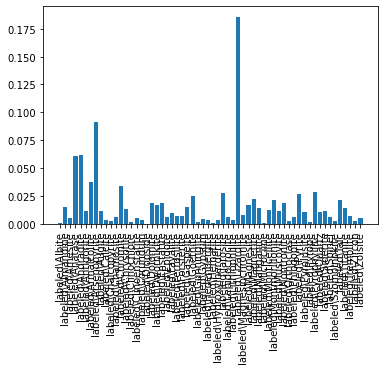

In [21]:
plt.xticks(rotation='vertical')
plt.bar(x = S2.labels, height = S2.value)

In [22]:
S1.sort_values("value", ascending=False)

,labels,value
35,labeled\Lizardite,0.236547
32,labeled\Jarosite,0.123293
60,labeled\Zoisite,0.073084
26,labeled\Goethite,0.067446
3,labeled\Anatase,0.062223
2,labeled\Amesite,0.053338
4,labeled\Andradite,0.048321
6,labeled\Armalcolite,0.041490
25,labeled\Gaspeite,0.035298
41,labeled\Monticellite,0.033301


In [23]:
S2.sort_values("value", ascending=False)

,labels,value
35,labeled\Lizardite,0.185914
7,labeled\Arsenopyrite,0.091352
4,labeled\Andradite,0.061944
3,labeled\Anatase,0.060424
6,labeled\Armalcolite,0.037603
12,labeled\Chromite,0.033419
51,labeled\Pyrophyllite,0.028061
32,labeled\Jarosite,0.027565
48,labeled\Pyrite,0.026784
26,labeled\Goethite,0.024858
